In [1]:
#!pip install numpy
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_orig =pd.read_csv('clinical.csv')
df_orig.head(10)

,ID,Outcome,Survival.Months,Age,Grade,Num.Primaries,T,N,M,Radiation,Stage,Primary.Site,Histology,Tumor.Size,Num.Mutated.Genes,Num.Mutations
0,1,Alive,9.0,67,4,0,UNK,2.0,NaN,0,IV,Left Lower Lobe,Squamous cell carcinoma,1.4,8,8
1,2,Dead,19.0,73,2,0,UNK,2.0,0.0,5,IV,Right Upper Lobe,Adenocarcinoma,NaN,2,2
2,3,Dead,13.0,72,3,0,2,2.0,0.0,0,IIIA,Right Upper Lobe,Adenocarcinoma,1.5,1,1
3,4,Dead,15.0,69,9,1,1a,0.0,1.0,0,IA,Right Upper Lobe,Adenocarcinoma,NaN,4,4
4,5,Dead,10.0,76,9,0,UNK,NaN,NaN,0,IIIA,Left Hilar,Large-cell carcinoma,NaN,3,3
5,6,Dead,11.0,62,9,0,3,2.0,NaN,0,IVB,Left Hilar,Adenocarcinoma,NaN,4,5
6,7,Dead,13.0,72,2,0,4,NaN,1.0,5,IV,Right Hilar,Adenocarcinoma,5.5,4,4
7,8,Dead,13.0,72,2,0,3,NaN,0.0,0,IIA,Right Upper Lobe,Adenocarcinoma,2.0,2,2
8,9,Dead,19.0,72,9,0,4,NaN,0.0,0,IIA,Right Upper Lobe,Squamous cell carcinoma,2.0,3,3
9,10,Alive,9.0,83,3,0,UNK,NaN,NaN,5,IV,Left Upper Lobe,Squamous cell carcinoma,NaN,3,3


In [44]:
df = pd.read_csv('clinical.csv')
df2 = pd.read_csv('clinical.csv')
df_gene = pd.read_csv('genomics.csv')

In [45]:
print(df.isna().sum())
print(df_gene.isna().sum())

ID                    0
Outcome               0
Survival.Months       0
Age                   0
Grade                 0
Num.Primaries         0
T                     0
N                    65
M                    96
Radiation             0
Stage                 0
Primary.Site          0
Histology             0
Tumor.Size           92
Num.Mutated.Genes     0
Num.Mutations         0
dtype: int64
ID      0
Gene    0
dtype: int64


# Extract Significant Genes from Genomics Dataset

In [46]:
genes = df_gene.Gene.unique()
for gene in genes:
    df2[gene] = 0
    
for patient_id in df_gene['ID'].unique():
    df_temp = df_gene[df_gene['ID']==patient_id]
    for gene in df_temp['Gene'].unique():
        df2.loc[df['ID']==patient_id,gene] = 1


df_com = df2[genes]
df_com['Outcome'] = df2['Outcome']

outcome_dict = dict()
outcome_dict['Alive'] = 1
outcome_dict['Dead'] = 0
df_com['Outcome'] = df_com['Outcome'].map(outcome_dict)

C:\Users\jbae42\AppData\Local\Temp/ipykernel_22624/998031329.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com['Outcome'] = df2['Outcome']
C:\Users\jbae42\AppData\Local\Temp/ipykernel_22624/998031329.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com['Outcome'] = df_com['Outcome'].map(outcome_dict)


## Testing the significance between cateorical variables with Chi-Square test

In [47]:
df_com

,AKT1,ALK_Col1,ALK_Col2,APC,ATM_Col1,ATM_Col2,BRAF,CCND2,CDKN2A,CTNNB1,...,RB1,SMARCA4,SMARCB1,SMO,STK11,TERT,TP53_Col1,TP53_Col2,TSC2,Outcome
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
187,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
188,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
import scipy.stats

def make_table(df, col):
    res = []
    for val in df[col].unique():
        zero = len(df[df[col]==val][df['Outcome']==0])
        one = len(df[df[col]==val][df['Outcome']==1])
        res.append([zero,one])
        
    return res

prob = 0.95
alpha = 1 - prob

cols_kept = []

for col in genes:
    table = make_table(df_com, col)
    stat_score, p, dof, expected = scipy.stats.chi2_contingency(table)
    if p <= alpha:
        print(col, ": Dependent (reject H0)")
        cols_kept.append(col)
    else:
        print(col, ": Independent (failed to reject H0)")

C:\Users\jbae42\AppData\Local\Temp/ipykernel_22624/1962231704.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zero = len(df[df[col]==val][df['Outcome']==0])
C:\Users\jbae42\AppData\Local\Temp/ipykernel_22624/1962231704.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  one = len(df[df[col]==val][df['Outcome']==1])


AKT1 : Independent (failed to reject H0)
ALK_Col1 : Independent (failed to reject H0)
ALK_Col2 : Independent (failed to reject H0)
APC : Dependent (reject H0)
ATM_Col1 : Dependent (reject H0)
ATM_Col2 : Independent (failed to reject H0)
BRAF : Independent (failed to reject H0)
CCND2 : Independent (failed to reject H0)
CDKN2A : Dependent (reject H0)
CTNNB1 : Dependent (reject H0)
DNMT3A : Dependent (reject H0)
EGFR : Dependent (reject H0)
ERBB3 : Independent (failed to reject H0)
ERBB4 : Independent (failed to reject H0)
ESR1 : Independent (failed to reject H0)
FBXW7 : Independent (failed to reject H0)
FGFR1 : Independent (failed to reject H0)
FGFR3 : Independent (failed to reject H0)
FLT4 : Independent (failed to reject H0)
FOXL2 : Independent (failed to reject H0)
GNAS : Independent (failed to reject H0)
HNF1A : Independent (failed to reject H0)
KRAS_Col1 : Independent (failed to reject H0)
KRAS_Col2 : Independent (failed to reject H0)
MAP2K2 : Independent (failed to reject H0)
MET : 

## As a result, we have genes that are significant to 'Outcome'

In [49]:
cols_kept

['APC',
 'ATM_Col1',
 'CDKN2A',
 'CTNNB1',
 'DNMT3A',
 'EGFR',
 'MSH2',
 'NOTCH1',
 'PDGFRB',
 'POLD_Col2',
 'PTCH1']

## Add these genes to the dataset

In [50]:
df[cols_kept] = df_com[cols_kept]

# Quick Look at the Dataset

In [51]:
df.shape

(190, 27)

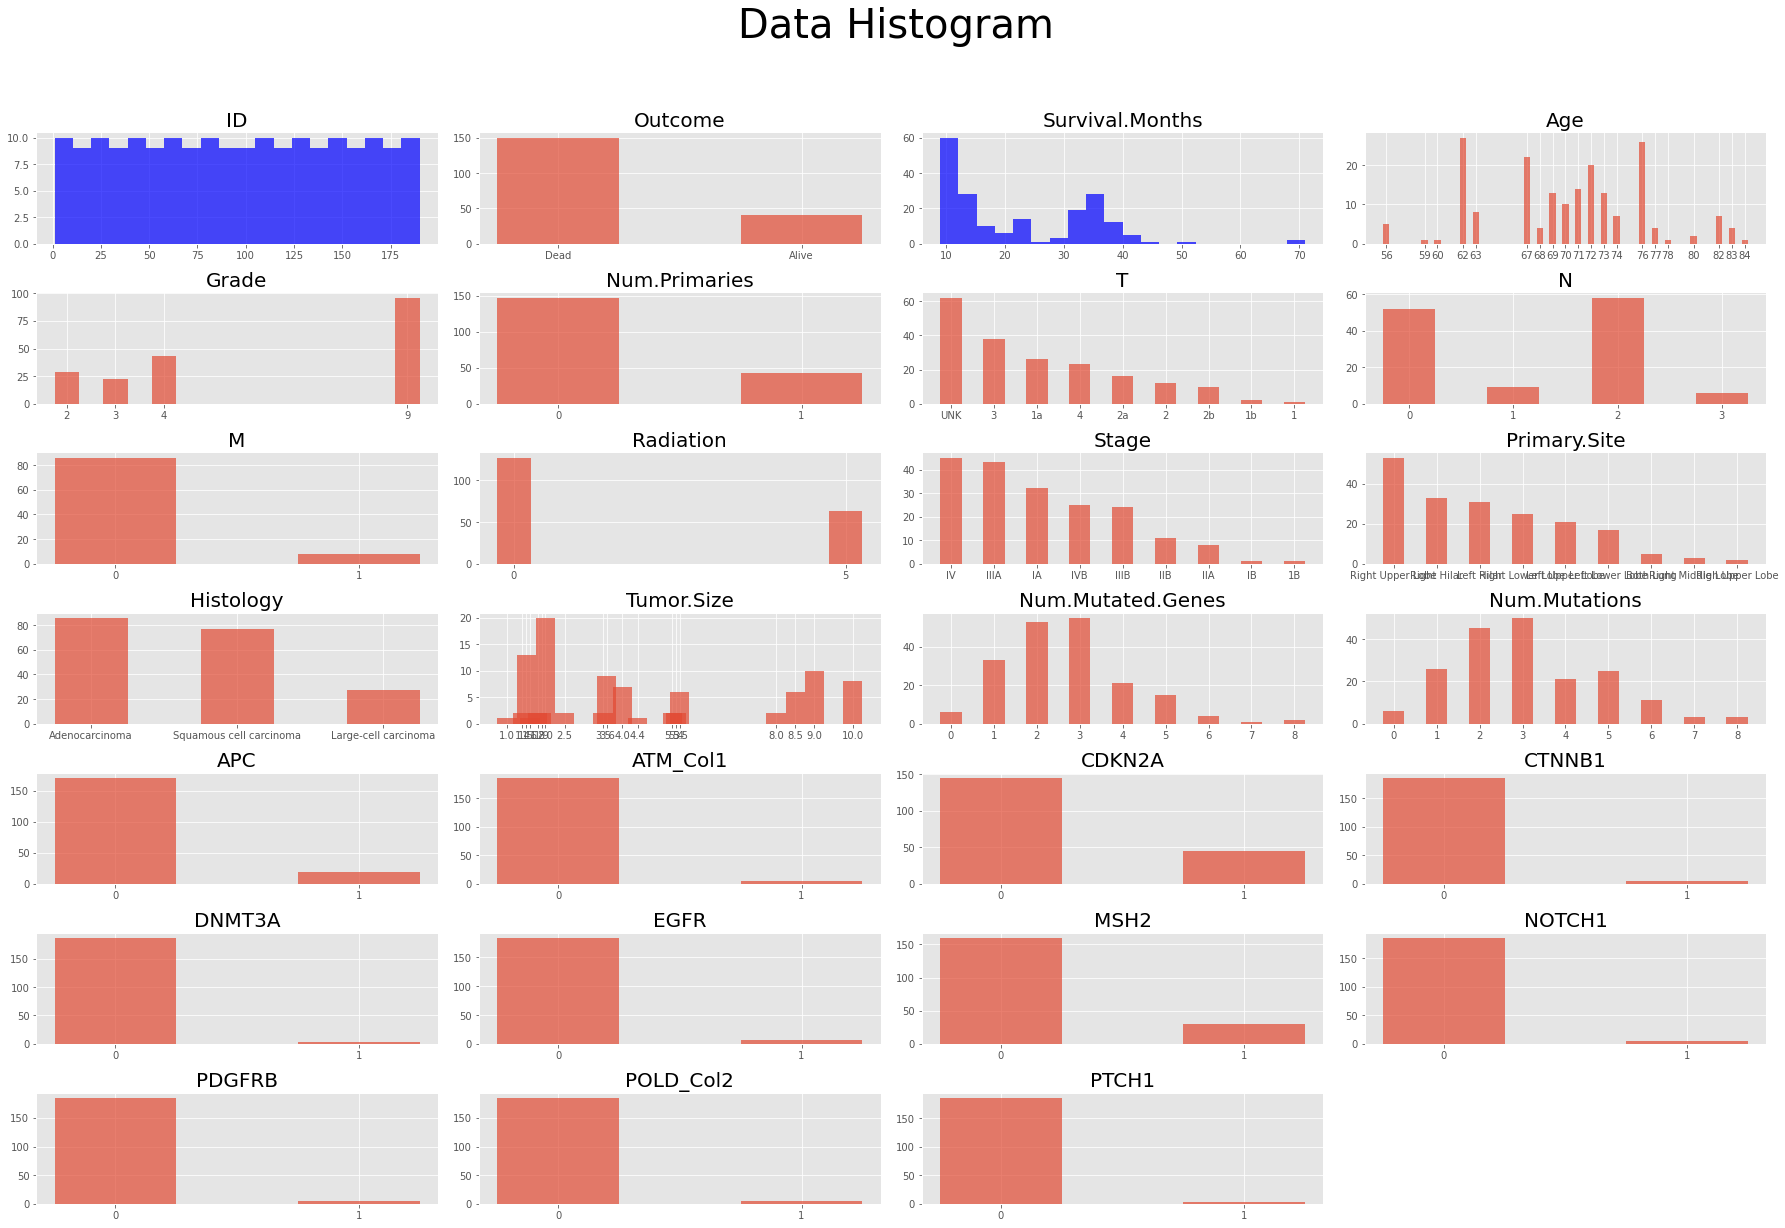

In [53]:
plt.style.use("ggplot")

# Looking at the distribution using histograms
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

cols = df.columns
for i in range(len(cols)):
    plt.subplot(8,4,i+1)
    plt.title(cols[i], fontsize=20)
    if len(df[cols[i]].unique()) > 20:
        plt.hist(df[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = df[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



### It should be noted that 'Survival.Months', 'T', 'Stage', and 'Primary.Site' are skewed to right. However, in 'T', UNK (unknown) has the most number of instances.

In [54]:
df.columns

Index(['ID', 'Outcome', 'Survival.Months', 'Age', 'Grade', 'Num.Primaries',
       'T', 'N', 'M', 'Radiation', 'Stage', 'Primary.Site', 'Histology',
       'Tumor.Size', 'Num.Mutated.Genes', 'Num.Mutations', 'APC', 'ATM_Col1',
       'CDKN2A', 'CTNNB1', 'DNMT3A', 'EGFR', 'MSH2', 'NOTCH1', 'PDGFRB',
       'POLD_Col2', 'PTCH1'],
      dtype='object')

In [55]:
df.head(10)

,ID,Outcome,Survival.Months,Age,Grade,Num.Primaries,T,N,M,Radiation,...,ATM_Col1,CDKN2A,CTNNB1,DNMT3A,EGFR,MSH2,NOTCH1,PDGFRB,POLD_Col2,PTCH1
0,1,Alive,9.0,67,4,0,UNK,2.0,NaN,0,...,0,0,0,0,1,0,0,1,0,0
1,2,Dead,19.0,73,2,0,UNK,2.0,0.0,5,...,0,0,0,0,0,0,0,0,0,0
2,3,Dead,13.0,72,3,0,2,2.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Dead,15.0,69,9,1,1a,0.0,1.0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,Dead,10.0,76,9,0,UNK,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Dead,11.0,62,9,0,3,2.0,NaN,0,...,0,0,0,0,0,1,0,0,0,0
6,7,Dead,13.0,72,2,0,4,NaN,1.0,5,...,0,0,0,0,0,0,0,0,0,0
7,8,Dead,13.0,72,2,0,3,NaN,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead,19.0,72,9,0,4,NaN,0.0,0,...,0,1,0,0,0,0,0,0,0,0
9,10,Alive,9.0,83,3,0,UNK,NaN,NaN,5,...,0,0,0,0,0,0,0,1,0,0


In [56]:
numeric_features = ['Age','Survival.Months','Tumor.Size','Num.Mutated.Genes','Num.Mutations']
ordinal_features = ['Grade','T','N','M','Num.Primaries']
nominal_features = ['Radiation','Histology','APC', 'ATM_Col1','CDKN2A', 'CTNNB1', 'DNMT3A', 'EGFR', 'MSH2', 
                    'NOTCH1', 'PDGFRB','POLD_Col2', 'PTCH1']

In [57]:
outcome_dict = dict()
outcome_dict['Alive'] = 1
outcome_dict['Dead'] = 0
df['Outcome'] = df['Outcome'].map(outcome_dict)

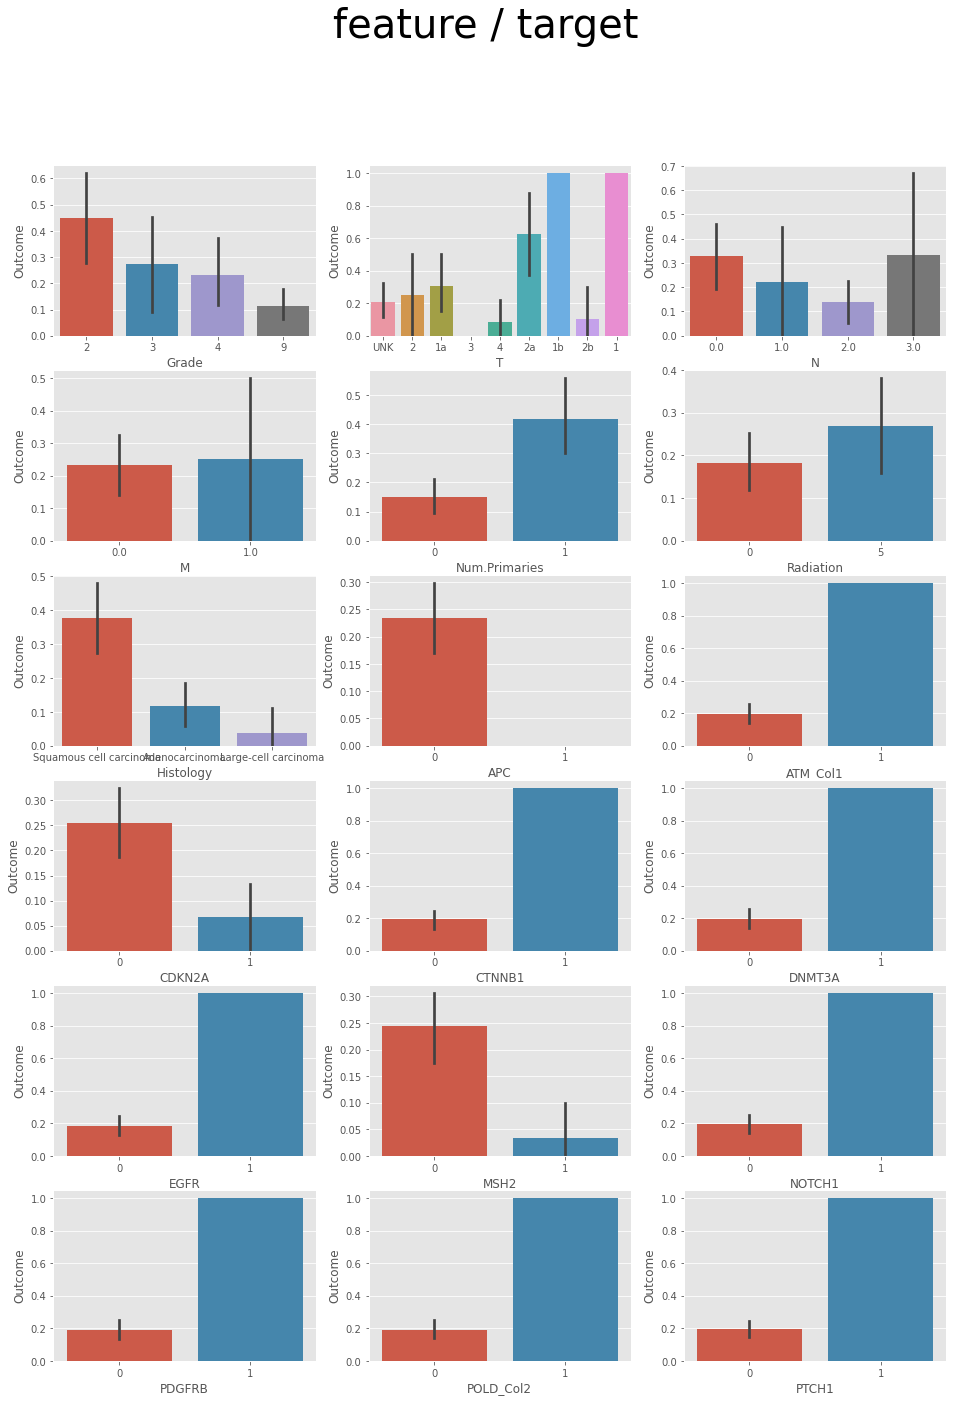

In [62]:
fig, ax = plt.subplots(6, 3, figsize = (16, 22))

plt.suptitle("feature / target", fontsize=40)

feature = ordinal_features + nominal_features

xvalue = 0
yvalue = 0

for xstr in feature:
    sns.barplot(x = xstr, y = 'Outcome', data = df, ax = ax[yvalue][xvalue])
        
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

## Looking at the skewness of the numerical features, log transformation is not necessary since all of them are below 1

Age Skew : -0.06628283680051696
Survival.Months Skew : 0.8849598309941257
Tumor.Size Skew : 0.6833176778752491
Num.Mutated.Genes Skew : 0.8101451888326517
Num.Mutations Skew : 0.5818293421939547


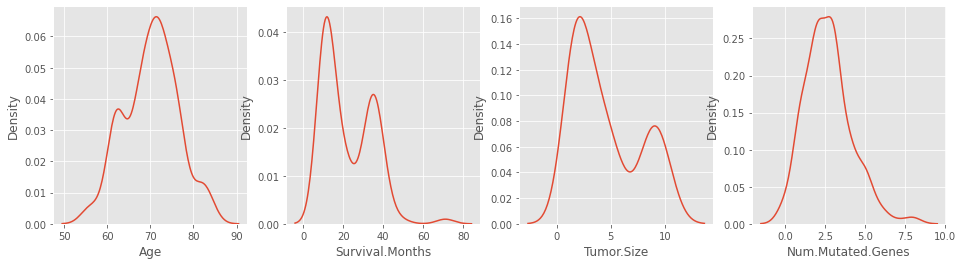

In [88]:
for xstr in numeric_features:
    print(xstr, "Skew :", df[xstr].skew())
    
fig, ax = plt.subplots(1, 4, figsize = (16, 4))

for xint in range(4):
    sns.kdeplot(x = numeric_features[xint], data = df, ax = ax[xint])

# Taking care of the missing values

### since 'UNK' in column T stands for Unknown, change this to NAs

In [70]:
df.loc[df['T']=='UNK','T'] = np.nan

In [86]:
print(df.isna().sum())

ID                    0
Outcome               0
Survival.Months       0
Age                   0
Grade                 0
Num.Primaries         0
T                    62
N                    65
M                    96
Radiation             0
Stage                 0
Primary.Site          0
Histology             0
Tumor.Size           92
Num.Mutated.Genes     0
Num.Mutations         0
APC                   0
ATM_Col1              0
CDKN2A                0
CTNNB1                0
DNMT3A                0
EGFR                  0
MSH2                  0
NOTCH1                0
PDGFRB                0
POLD_Col2             0
PTCH1                 0
dtype: int64


### Using Datawig, we can impute the missing values based on other features.
#### first, let's encode the features with string values

In [ ]:
import datawig

In [79]:
convert_cols = ['Primary.Site', 'Histology', 'Stage']
for col in convert_cols:
    temp_dict = dict()
    for num, val in enumerate(df[col].unique()):
        temp_dict[val] = num
    df[col] = df[col].map(temp_dict)

In [80]:
df['T'].unique()

array([nan, '2', '1a', '3', '4', '2a', '1b', '2b', '1'], dtype=object)

In [82]:
T_dict = dict()
T_dict['1'] = 1
T_dict['1a'] = 2
T_dict['1b'] = 3
T_dict['2'] = 4
T_dict['2a'] = 5
T_dict['2b'] = 6
T_dict['3'] = 7
T_dict['4'] = 8

df['T'] = df['T'].map(T_dict)

#### second, select a couple features that are significant to the "target" feature (with missing value)

In [84]:
corr_matrix = df.corr()

In [87]:
corr_matrix["T"].sort_values(ascending=False)[:5]

T            1.000000
Histology    0.314471
MSH2         0.268380
APC          0.238738
Grade        0.217473
Name: T, dtype: float64

In [ ]:
target_feature = "T"

imputer = datawig.SimpleImputer(input_columns=['Histology', 'MSH2', 'APC'],
                                output_column=target_feature)
imputer.fit(train_df=df, num_epochs=50)

null_train = df[df[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(df)):
    if np.isnan(df[target_feature].iloc[i]) == True:
        df[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1

In [76]:
corr_matrix["N"].sort_values(ascending=False)[:5]

N                1.000000
MSH2             0.285707
APC              0.246189
EGFR             0.168642
Num.Mutations    0.126847
Name: N, dtype: float64

In [ ]:
target_feature = "N"

imputer = datawig.SimpleImputer(input_columns=['MSH2', 'APC'],
                                output_column=target_feature)
imputer.fit(train_df=df, num_epochs=50)

null_train = df[df[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(df)):
    if np.isnan(df[target_feature].iloc[i]) == True:
        df[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1

In [77]:
corr_matrix["M"].sort_values(ascending=False)[:5]

M            1.000000
POLD_Col2    0.378415
EGFR         0.219226
NOTCH1       0.161519
Age          0.161493
Name: M, dtype: float64

In [ ]:
target_feature = "M"

imputer = datawig.SimpleImputer(input_columns=['POLD_Col2', 'EGFR'],
                                output_column=target_feature)
imputer.fit(train_df=df, num_epochs=50)

null_train = df[df[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(df)):
    if np.isnan(df[target_feature].iloc[i]) == True:
        df[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1

In [78]:
corr_matrix["Tumor.Size"].sort_values(ascending=False)[:5]

Tumor.Size       1.000000
Grade            0.126967
Radiation        0.064322
Num.Mutations    0.049900
PTCH1            0.045183
Name: Tumor.Size, dtype: float64

In [ ]:
target_feature = "M"

imputer = datawig.SimpleImputer(input_columns=['Grade', 'Radiation'],
                                output_column=target_feature)
imputer.fit(train_df=df, num_epochs=50)

null_train = df[df[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(df)):
    if np.isnan(df[target_feature].iloc[i]) == True:
        df[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1

#### As a result, all missing data were imputed

In [90]:
print(df.isna().sum())

ID                   0
Outcome              0
Survival.Months      0
Age                  0
Grade                0
Num.Primaries        0
T                    0
N                    0
M                    0
Radiation            0
Stage                0
Primary.Site         0
Histology            0
Tumor.Size           0
Num.Mutated.Genes    0
Num.Mutations        0
APC                  0
ATM_Col1             0
CDKN2A               0
CTNNB1               0
DNMT3A               0
EGFR                 0
MSH2                 0
NOTCH1               0
PDGFRB               0
POLD_Col2            0
PTCH1                0
dtype: int64


#### Finalize the features after taking care of the missing values

In [93]:
corr_matrix = df.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome              1.000000
EGFR                 0.349689
POLD_Col2            0.318357
PDGFRB               0.318357
CTNNB1               0.283981
NOTCH1               0.283981
ATM_Col1             0.283981
PTCH1                0.283981
Num.Primaries        0.276045
DNMT3A               0.245276
Survival.Months      0.200126
Age                  0.195949
Num.Mutations        0.134441
Num.Mutated.Genes    0.129691
Radiation            0.102473
M                    0.067171
ID                  -0.008238
Primary.Site        -0.022454
APC                 -0.172133
N                   -0.180346
MSH2                -0.188202
CDKN2A              -0.196580
Tumor.Size          -0.209563
Grade               -0.264501
T                   -0.301111
Histology           -0.326244
Name: Outcome, dtype: float64

#### Drop the columns with low correlations (< 0.25)
##### Dropped columns: ID, M, Primary.Site, APC, N, MSH2, CDKN2A, Tumor.Size, Radiation, Num.Mutated.Genes, Num.Mutations, Age, Survival.Months, DNMT3A

In [95]:
df.drop(columns=['ID', 'M', 'Primary.Site', 'APC', 'N', 'MSH2', 'CDKN2A', 'Tumor.Size', 
                 'Radiation', 'Num.Mutated.Genes', 'Num.Mutations', 'Age', 'Survival.Months', 'DNMT3A'], inplace=True)

# Modeling

In [106]:
X = df.drop(columns=(['Outcome']))
y = df['Outcome']

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier, StackingClassifier, GradientBoostingClassifier, BaggingClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier    
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score 
from sklearn.model_selection import cross_val_score

model0 = LogisticRegression()
model1 = RandomForestClassifier()
model2 = ExtraTreesClassifier()
model3 = GradientBoostingClassifier()
model4 = BaggingClassifier()
model5 = XGBClassifier()
model6 = LGBMClassifier()

estimators = [('rfc',model1),('xtc',model2),('gbc',model3),('bc',model4),('xgb',model5),('lgbm',model6)]

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

stacking = StackingClassifier(estimators=estimators, final_estimator=model0, cv=5, n_jobs=-1)

stacking.fit(x_train,y_train)
pred = stacking.predict(x_val)
print(f1_score(y_val, pred, average='micro'))

0.8245614035087719


C:\Users\jbae42\Anaconda3\envs\base2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


# Questions

## 1.  This data, like our real data, may be messy, incomplete, and/or sparsely documented.
##     Please walk us through how you cleaned up this dataset. Do you see any interesting trends?

#### I first combined the 'genomics' dataset with 'clinical' dataset by extracting the significant features from 'genomics' dataset.
#### I created a new dataset with all patient IDs, the 'Outcome' feature, and encoded all 'gene' feature from the 'genomics' dataset as one hot encoding.
#### This dataset showed whether each patient had a gene from the 'genomics' dataset (1: had, 0: didn't have). Then I performed a Chi-square test to identify which genes were significant on the 'Outcome' feature.
#### It should be also noted that 'T' feature had 'UNK' values which stands for unknown - I changed this to NAs in order to identify them as missing values.
#### Once all the missing values are correctly labeled as NA values, I used Datawig to impute the missing values.
#### Using SimpleImputer in Datawig, I can assign other features that can be used to predict the missing values. The assigned features were determined based on the correaltion to the target feature (feature with the missing value)

## 2. Tell us how you decided which features to use for your model. Are there any new features it might be productive to engineer from the current features?



#### I selected the features based on the correlation scores. However, I realized after I finished that the calculated correlations are based on the pearson correlation by Pandas' default. The correlation tests should have been done with Chi-square (for the categorical independent varaibles) and point-biserieal correlation (for the numerical indepednet variables). 

## 3. Which algorithm did you use for the prediction and why?


#### I stacked tree-based classifiers for the prediction. Using StackingClassifier, we can automate which model has more say in the final voting system. Also, using multiple models often outperforms just a single model.

## 4. How did you assess the predictive model’s quality? Summarize your findings.


#### F1 score was used to assess the model's performance. An F1 score of 82.5% was achieved. The score can be improved by collecting more data or investigating more into EDA.

#### Based on the quick look into the data, it seems like there are certain genes that have significant impact on the patients' survival. Some other significant features include histology, tumor stage, tumor grade, and tumore size.

## 5. Next steps? What might you do with more time or access to additional data or expertise?

#### I would spend more time in the data preparation step if I had more time or access to additional data or expertiese. More features can be generated by combining the existing features with some insights from the expertise. Some limitations that I faced with the given dataset include the dataset size (bigger dataset would have been helpful for the model performance), high number of missing values (degrade the dataset quality), and the given features (as shown in the above code, the features do not show high correlation to the 'Outcome' feature). 

#### Also, if I had more time, I would run the following codes and select the best performing methods. I would also spend time on hyperparameter tuning for improvements.

### Alternative 1: Pycaret
#### we can quickly build and compare the classification models using Pycaret

In [ ]:
from pycaret.classification import *

print(pycaret.__version__)
clf1 = setup(data = df_train,
             silent = True,
             target = 'Outcome',
             session_id = 20220219,
             n_jobs = -1)


#best = compare_models(n_select=3, fold = 5)
best = compare_models(exclude=['knn'], n_select=3)

blend_3_soft = blend_models(estimator_list=best, method='hard', choose_better = True)
final_blend_3_soft = finalize_model(blend_3_soft)

predictions = predict_model(final_blend_3_soft, data = df_test)

predictions.to_csv('pred.csv', index=False)

from sklearn.metrics import f1_score, recall_score

f1 = f1_score(df_test['Outcome'], predictions['Label'], average='macro')
recall = recall_score(df_test['Outcome'], predictions['Label'], average='macro')
print("F1 Score= ",f1)
print("Recall= ", recall)

### Alternative 2: Selecting Top-performing Estimators based on F1 Score

In [ ]:
model0 = LogisticRegression()
model1 = RandomForestClassifier()
model2 = ExtraTreesClassifier()
model3 = GradientBoostingClassifier()
model4 = BaggingClassifier()
model5 = XGBClassifier()
model6 = LGBMClassifier()

estimators = [('rfc',model1),('xtc',model2),('gbc',model3),('bc',model4),('xgb',model5),('lgbm',model6)]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
i = 0
for name, model in estimators:
    for tr_idx, val_idx in kf.split(X):
        x_train, y_train = X.iloc[tr_idx], y.iloc[tr_idx]
        x_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
        
        model.fit(x_train, y_train)
        result.loc[i, 'model'] = name
        result.loc[i, 'f1score'] = f1_score(y_val, model.predict(x_val), average='micro')
        
        i += 1

final_estimator ### SELECT TOP PERFORMING ESTIMATORS HERE ###
        
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

stacking = StackingClassifier(estimators=estimators, final_estimator=model0, cv=5, n_jobs=-1)

stacking.fit(x_train,y_train)
pred = stacking.predict(x_val)
print(f1_score(y_val, pred, average='micro'))

### Alternative 3: Blending the Models
#### Sometimes, simple blending (taking the average of the models' predictions) outperforms the stacking method